<h1>7. Topic Modelling (LDA) on the <i>User Report:</i> free text column.</h1>
<HR WIDTH="100%" size="6">

This notebook presents a very brief introduction to Topic Modelling on the free text column on the <i>User Report:</i>. LDA is applied to rich words only (adjectives, nouns). A visualisation of the Topics is provided using the <b>pyLDAvis</b> library. 


<table>
  <tr>
    <td><b>Step</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr> 
  <td><b>7.1</b> Read in dataset from a pandas pickle.</td>
    <td>In Notebook 6, the POS tags for each word was created using NLTK. A subset of the words <i>(nouns,adjectives)</i> were selected from creating Word Cloud. That data was saved as <i>pandas pickle</i> The dataset is read in.</td>
  </tr>
  <tr>
  <td><b>7.2</b> Tokenize the rich words.</td>
  <td> Create list of tokenize words/terms for input into the Dicionary/Corpus methods of the <b>Gensim</b> package. </td>
  </tr>
  <tr>  
  <td><b>7.3</b> Dictionary and Corpus Creation</td>
  <td>Define how the dictionary and corpus will be created for LDA. Additional stopwords are created if there are less than 25 occurences across corpus or they occur in more than 0.40 of docs. Build the Dictionary and the Corpus. Create the LDA model. </td>
  </tr>
  <tr> 
      <td><b>7.4</b> Visualisaton of Topics</td>
      <td> Visualise the distribution of the <b>Warning:</b> label by Topic </td>
  </tr>
  <tr> 
  <td><b>7.5</b> Interactive Visualisaton of Topics </td>
  <td> Visualise the topics using the <b>pyLDAvis</b> library </td>
  </tr>
  <tr> 
      <td><b>7.6</b> Function to define color breaks</td>
      <td>Create a function that returns a hex values of RGBA colour. Use the number of levels/factors of an attribute to determine the splits.</td>
  </tr>
  <tr> 
      <td><b>7.7</b> Plot PCA</td>
      <td>Plot the 1st and 2nd PCA components on a scatter plot. Color the points based on a selection of columns with nominal data. </td>
  </tr>
    </table>

<table align='left'>
   <tr>
   <th colspan="4"><p style="text-align: center;">Packages Used</p></th>
  </tr>
  <tr style="background-color:azure">
    <td>Package</td>
    <td>Pre-installed with Anaconda</td>
    <td>Install instruction from command line</td>
    <td>Documentation Link</td>
    </tr>
    <tr>
    <td>pandas</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://pandas.pydata.org/</td>
   </tr>
   <tr>
   <td>nltk</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://www.nltk.org/</td>
   </tr>
   <tr>
   <td>gensim</td>
    <td><p style="text-align: center;">&#x2718;</p></td>
    <td>pip install gensim</td>
    <td>https://radimrehurek.com/gensim/</td>
   </tr>
   <tr>
   <td>matplotlib</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://matplotlib.org/index.html</td>
    </tr>
    <tr>
    <td>seaborn</td>
    <td><p style="text-align: center;">&#x2718;</p></td>
    <td>pip install seaborn</td>
    <td>http://stanford.edu/~mwaskom/software/seaborn/</td>
    </tr>
    <tr>
    <td>pyLDAvis</td>
    <td><p style="text-align: center;">&#x2718;</p></td>
    <td>pip install pyldavis</td>
    <td>https://pypi.python.org/pypi/pyLDAvis</td>
    </tr>
</table><br clear="left"/>



 <HR WIDTH="100%" size="6">

<h3>7.1 Read in data and filter rows </h3>

Read in the data that was pickled in notebook 6

In [3]:
import pandas as pd
ldaDF = pd.read_pickle("Data/clusterDF")

In [9]:
columns_to_show=["User Report","Warning","SC Category","Tagged","Rich_words"]
ldaDF[columns_to_show].head()

,User Report,Warning,SC Category,Tagged,Rich_words
967,My user report cannot be accurate as I was tak...,no,mdxx,"[(My, PRP$), (user, NN), (report, NN), (can, M...",user report accurate other pill little effect
971,"Wanting to chase 'the clean high', we decided ...",no,mdxx,"[(Wanting, VBG), (to, TO), (chase, VB), ('the,...",'the clean high alcohol pill comfortable bit c...
973,Sorry for not posting a picture but me and my ...,yes,other,"[(Sorry, NNP), (for, IN), (not, RB), (posting,...",picture description first time bad research ma...
976,i consumed the pill around 10pm and about 10:4...,no,mdxx,"[(i, PRP), (consumed, VBD), (the, DT), (pill, ...",pill drop blast night good n
979,"Okay, i got sick and tired of waiting for a co...",no,mdxx,"[(Okay, NNP), (,, ,), (i, PRP), (got, VBD), (s...",sick tired confirmation strength white mate no...


<h3>7.2 Tokenize the rich words.</h3>

Gensim package takes a list of token terms per document as input. 

In [12]:
#Not currently used, could creat biagrams of words
def bigrams(text):
    text=[text]
    bigrams = [' '.join(b) for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
    return bigrams

In [13]:
#Code taken directly from 
import nltk
ldaDF['wr_tokens']=ldaDF['Rich_words'].apply(nltk.word_tokenize)
#ldaDF['wr_tokens2']=ldaDF['Rich_words'].apply(bigrams)

In [14]:
columns_to_show=["User Report","Warning","SC Category","Tagged","wr_tokens"]
ldaDF[columns_to_show].head()

,User Report,Warning,SC Category,Tagged,wr_tokens
967,My user report cannot be accurate as I was tak...,no,mdxx,"[(My, PRP$), (user, NN), (report, NN), (can, M...","[user, report, accurate, other, pill, little, ..."
971,"Wanting to chase 'the clean high', we decided ...",no,mdxx,"[(Wanting, VBG), (to, TO), (chase, VB), ('the,...","['the, clean, high, alcohol, pill, comfortable..."
973,Sorry for not posting a picture but me and my ...,yes,other,"[(Sorry, NNP), (for, IN), (not, RB), (posting,...","[picture, description, first, time, bad, resea..."
976,i consumed the pill around 10pm and about 10:4...,no,mdxx,"[(i, PRP), (consumed, VBD), (the, DT), (pill, ...","[pill, drop, blast, night, good, n]"
979,"Okay, i got sick and tired of waiting for a co...",no,mdxx,"[(Okay, NNP), (,, ,), (i, PRP), (got, VBD), (s...","[sick, tired, confirmation, strength, white, m..."


<h3>7.3 Dictionary and Corpus Creation and LDA Model</h3>

Define how the dictionary and corpus will be created for LDA. Additional stopwords are created if there are less than 25 occurences across corpus or they occur in more than 0.40 of docs. Build the Dictionary and the Corpus. Create the LDA model. 

In [22]:
from gensim.corpora import Dictionary, MmCorpus
from gensim import models


def nltk_stopwords():
    return set(nltk.corpus.stopwords.words('english'))

def prep_corpus(docs, additional_stopwords=set(), no_below=25, no_above=0.4):
  print('Building dictionary...')
  dictionary = Dictionary(docs)
  stopwords = nltk_stopwords().union(additional_stopwords)
  stopword_ids = map(dictionary.token2id.get, stopwords)
  dictionary.filter_tokens(stopword_ids)
  dictionary.compactify()
  dictionary.filter_extremes(no_below=no_below, no_above=no_above, keep_n=None)
  dictionary.compactify()

  print('Building corpus...')
  corpus = [dictionary.doc2bow(doc) for doc in docs]

  return dictionary, corpus

In [23]:
dictionary, corpus = prep_corpus(ldaDF['wr_tokens'])

Building dictionary...
Building corpus...


In [27]:
#Can Save Corpus and dictionary if want to repeat and faster load times.
#MmCorpus.serialize('pills.mm', corpus)
#dictionary.save('pills.dict')

In [24]:
%%time
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=20)
                                      
#lda.save('pills_10.model')

Wall time: 1min 31s


<h3>7.4 Visualisaton of Topics </h3>

Visualise the distribution of the <b>Warning:</b> label by Topic</h3>

In [27]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [29]:
#Get the probability of each topic for a document
doc_topic_prob=[lda[c] for c in corpus]

#Function to extract the topic with the max probability
from operator import itemgetter
def maxtopic(x):
    return max(x,key=itemgetter(1))[0]

#Add the topic number with max probability for each document to the dataFrame
ldaDF['Max_Topic_Prob']=(map(maxtopic, doc_topic_prob))
ldaDF['Max_Topic_Prob']=(ldaDF['Max_Topic_Prob']+1).astype(object)

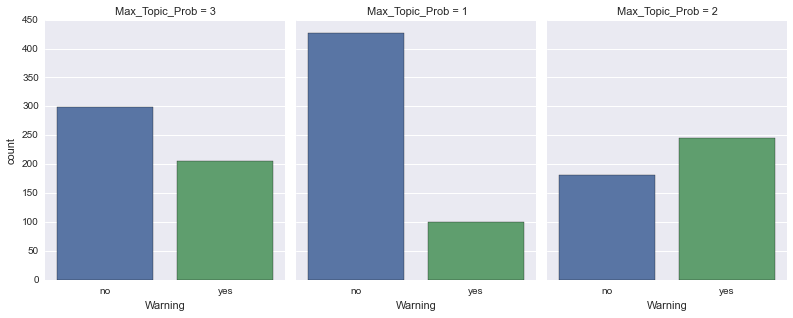

In [30]:
g = sns.factorplot("Warning", col="Max_Topic_Prob", col_wrap=4,data=ldaDF,kind="count", size=4.5, aspect=.8)

<h3>7.5 Interactive Visualisaton of Topics </h3>

Visualise the topics using the pyLDAvis library

In [33]:
import pyLDAvis.gensim
vis_data=pyLDAvis.gensim.prepare(lda, corpus, dictionary,n_jobs=1)
pyLDAvis.display(vis_data)

<h3>7.6 Function to define color breaks</h3>

User defined function, to read in matplotlib colour map ('<b>hsv</b>') and break this up depending on the number of levels per plot.

In [37]:
%matplotlib inline 
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
colormap = plt.get_cmap('hsv') 


#@colormap is set
#@breaks varied depending on number of levels. E.g. Warning: yes|no has two levels.

def colors_at_breaks(colormap, breaks):
    return [rgb2hex(colormap(x)) for x in breaks]

#Code for color breaks based on answer to;
#http://stackoverflow.com/questions/19322768/how-to-determine-colors-at-intervals-in-a-matplotlib-colormap


<h3>7.7 Plot PCA </h3>

<p> First two principal components plotted and colored by a list of nominal variables. 
The number of levels in a nominal variable is used to break the color scale, set out above function. Same as previous notebook but Topic membership now included</p>

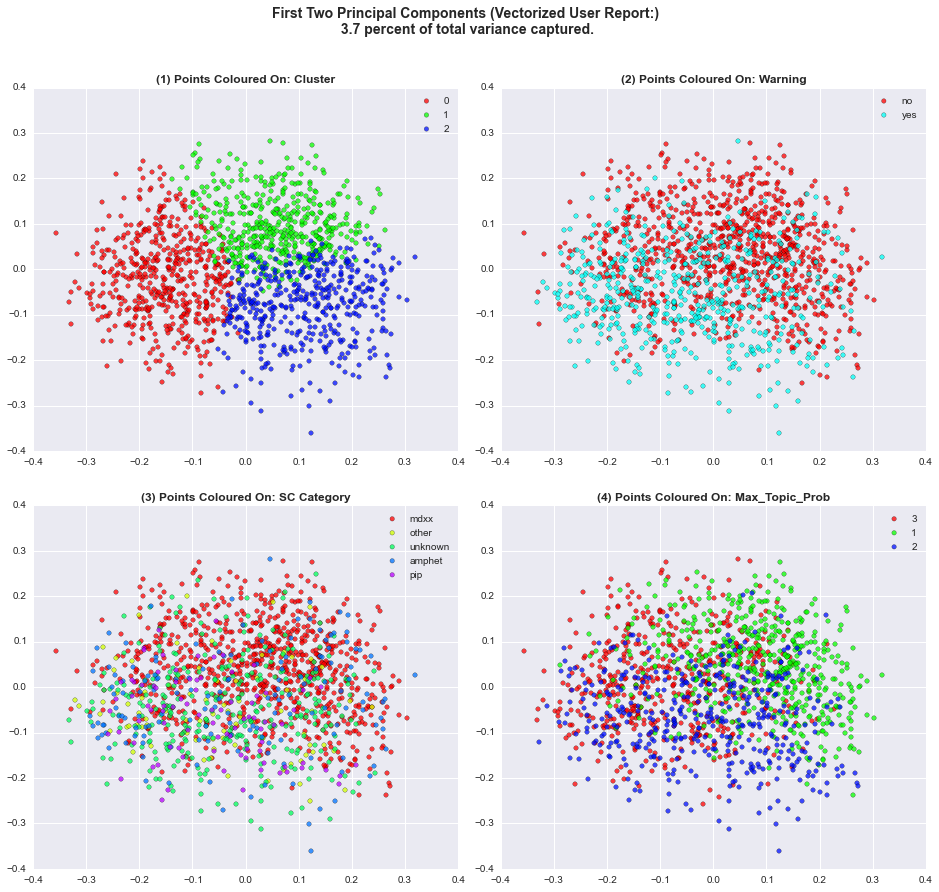

In [39]:
columnlist=['Cluster','Warning','SC Category','Max_Topic_Prob'] #'Tested'

#Create plot with 3 rows and 2 columns
fig, axs = plt.subplots(2,2, figsize=(16, 14), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .15, wspace=.1)
plt.suptitle("First Two Principal Components (Vectorized User Report:) \n 3.7 percent of total variance captured.", fontsize=14,fontweight='bold')  


#Create index of all the subplots.
axs = axs.ravel()

for col in range(len(columnlist)):
    
    levelslist=ldaDF[columnlist[col]].unique().tolist()
    split=float(1.0/(len(ldaDF[columnlist[col]].unique().tolist())))
    breaks=np.arange(0.0,1.0,split)
    colors=colors_at_breaks(colormap,breaks)
    
    plt.figure()
    for c, i, target_name in zip(colors, levelslist, levelslist):
        axs[col].scatter(ldaDF['PC1'][(ldaDF[columnlist[col]]==i)],
                    ldaDF['PC2'][(ldaDF[columnlist[col]]==i)],c=c,label=target_name,alpha=0.75)
        axs[col].set_title("("+(str(col+1)+") Points Coloured On: "+columnlist[col]),fontweight='bold')
        axs[col].legend()
           
    
 
#Uncomment to save the figure
#fig.savefig('img6_8_new.png',dpi=96,bbox_inches='tight') 